# Stock Price Prediction By LSTM And ARIMA
# GROUP 33 
### Group Members :
Abhishek Srinivasan

Bharathi Srinivasan

Pengcheng Wan

Qinwen Zeng


# Step 1 - Clean Up the Raw Data

## The above utility functions are directly from Dr. Nikolay A Simakov's course material:
https://github.com/nsimakov/eas503

## The raw data is downloaded from Yahoo! Finance.
https://finance.yahoo.com/quote/GOOG/



In [1]:
### Utility Functions
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows


In [2]:
# create a database
# connect to the database
normalized_database_filename = 'normalized.db'
conn = create_connection(normalized_database_filename, delete_db=True)

In [3]:
def creating_profile(filename):
    
    # reading the csv file
    df = pd.read_csv(filename)
    
    # selecting the profile values of the company
    
    for i, j in df.iterrows():
        info = {}
        ele = j['Info']
        insert_value = ['Google']

        for i in range(ele.count(':')):
            key = ele[0:ele.find("':'")].replace("'","")
            val = ele[ele.find("':'")+3:ele.find("' '")].strip()
            ele = ele[ele.find("' '")+2:]
            insert_value.append(val)
            info[f'{key}'] = val

    
    # creating the profile table

    create_table_info_sql = """
        CREATE TABLE Profile(
        [Company] VARCHAR NOT NULL PRIMARY KEY,
        [Zip] VARCHAR NOT NULL,
        [Sector] VARCHAR NOT NULL,
        [FullTime Employees] INT NOT NULL,
        [City] VARCHAR NOT NULL,
        [Phone] VARCHAR NOT NULL,
        [State] VARCHAR NOT NULL,
        [Country] VARCHAR NOT NULL,
        [Address] VARCHAR NOT NULL,
        [Industry] VARCHAR NOT NULL
        );

        """

    

    # running a table creation function

    create_table(conn,create_table_info_sql,'Profile')

    # inserting table values

    conn.executemany("INSERT INTO Profile VALUES(?,?,?,?,?,?,?,?,?,?)",[insert_value])

    
    

In [4]:
# !!!
# if you run the below queries and want to re-run this
# please restart kernal and start over
creating_profile('GOOGLE.csv')
Profile = pd.read_sql_query("""SELECT * FROM Profile""", conn)
Profile

,Company,Zip,Sector,FullTime Employees,City,Phone,State,Country,Address,Industry
0,Google,94043,Communication Services,150028,Mountain View,650-253-0000,CA,United States,1600 Amphitheatre Parkway,Internet Content & Information


## The above table is necessary for stock buyers to know about the basic information of the company

In [5]:
def creating_stock_price(filename):
    
    # creating a function to create the historical stock prices table 
    
    df = pd.read_csv(filename)
    date = []

    # selecting all the date values
    
    for i, j in df.iterrows():
        total_dates = j['Date']
        for i in range (int(j['Date'].count('-')/2)):
            date.append(total_dates[0:10])
            total_dates = total_dates[10:]


    # creating empty lists for the columns
    open_price,high_price,low_price,close_price,adjclose_price = [],[],[],[],[]
    company_name = []
    
    # selecting the values for each column
    for i, j in df.iterrows():
        total_open = j['Open']
        total_high = j['High']
        total_low = j['Low']
        total_close = j['Close']
        total_adjclose = j['AdjClose']

        
        # locating values
        
        first_decimal_point = total_open.find('.')

        open_price.append(total_open[0:first_decimal_point+6+1])
        total_open = total_open[first_decimal_point+1:]
        #print(total_open)

        high_price.append(total_high[0:first_decimal_point+6+1])
        total_high = total_high[first_decimal_point+1:]

        low_price.append(total_low[0:first_decimal_point+6+1])
        total_low = total_low[first_decimal_point+1:]  

        close_price.append(total_close[0:first_decimal_point+6+1])
        total_close = total_close[first_decimal_point+1:]  

        adjclose_price.append(total_adjclose[0:first_decimal_point+6+1])
        total_adjclose = total_adjclose[first_decimal_point+1:]  

        
        # adding values for each column

        for i in range(len(date)):
            dec = total_open.find('.')
            open_price.append(total_open[6:dec+6+1].strip())
            total_open = total_open[total_open.find('.')+1:]
            #total_open[dec+6+1:]

            high_price.append(total_high[6:dec+6+1].strip())
            total_high = total_high[total_high.find('.')+1:]
            #total_high[dec+6+1:]

            low_price.append(total_low[6:dec+6+1].strip())
            total_low = total_low[total_low.find('.')+1:]
            #total_low[dec+6+1:]

            close_price.append(total_close[6:dec+6+1].strip())
            total_close = total_close[total_close.find('.')+1:]

            adjclose_price.append(total_adjclose[6:dec+6+1].strip())
            total_adjclose = total_adjclose[total_adjclose.find('.')+2:]
            
            company_name.append('Google')

    
    # only selecting values for the corresponding date range

    open_price = open_price[0:len(date)]
    high_price = high_price[0:len(date)]
    low_price = low_price[0:len(date)]
    close_price = close_price[0:len(date)]
    adjclose_price = adjclose_price[0:len(date)]
    company_name = company_name[0:len(date)]

    # adding up all values and preparing for further inserting to the table


    insert_value = []
    for i in range (0,len(date)):
        insert_value.append([date[i],open_price[i],high_price[i],low_price[i],close_price[i],adjclose_price[i],company_name[i]])
    len(insert_value)


    # creating the historical stock price table

    create_table_stock_sql = """
        CREATE TABLE Stock_Prices(
        [Date] Date not null primary key,
        [Open] FLOAT NOT NULL,
        [High] FLOAT NOT NULL,
        [Low] FLOAT NOT NULL,
        [Close] FLOAT NOT NULL,
        [Adj Close] FLOAT NOT NULL,
        [Company] VARCHAR,
        FOREIGN KEY (Company) REFERENCES Profile(Company)
        );

        """

    # running a table creation function
    
    create_table(conn,create_table_stock_sql,'Stock_Prices')

    # inserting table values

    conn.executemany("INSERT INTO Stock_Prices VALUES(?,?,?,?,?,?,?)",insert_value)
    

In [6]:
# run the function we just created
# demonstrating the table using sqlite3

creating_stock_price('GOOGLE.csv')
stock_price = pd.read_sql_query("""SELECT * FROM Stock_Prices WHERE Company = 'Google';""", conn)
display (stock_price)

,Date,Open,High,Low,Close,Adj Close,Company
0,2008-01-02,345.141327,347.382935,337.599579,341.315674,341.315674,Google
1,2008-01-03,341.350525,342.142578,336.996857,341.385406,341.385400,Google
2,2008-01-04,338.575928,339.208557,326.277039,327.273285,327.273285,Google
3,2008-01-07,325.749023,329.903442,317.484985,323.412781,323.412781,Google
4,2008-01-08,325.280762,328.747772,314.321838,314.660583,314.660583,Google
...,...,...,...,...,...,...,...
3509,2021-12-08,2966.629883,2983.129883,2944.000000,2974.409912,2974.409912,Google
3510,2021-12-09,2963.520020,2992.100098,2950.580078,2962.120117,2962.120117,Google
3511,2021-12-10,2982.000000,2988.000000,2947.149902,2973.500000,2973.500000,Google
3512,2021-12-13,2968.879883,2971.250000,2927.199951,2934.090088,2934.090088,Google


## The above table is necessary for stock buyers to know about the historical stock prices

In [7]:
def creating_financials(filename): 
    #creating a function to create the financials table
    
    
    # reading the csvfile
    df = pd.read_csv(filename,header=None)
    
    
    # selecting the corresponding column
    # seperating the column and value
    
    col, vol = df[7]
    columns = col.split()
    values = vol.split()
    data = {}

    
    # creating empty lists
    FinancialsDate = []
    ResearchDevelopment = []
    IncomeBeforeTax = []
    NetIncome = []
    GrossProfit = []
    TotalRevenue = []
    Company_Name = []
    
    # locating and stroing the values for each column(list)
    for i in range(0,len(values),6):
        FinancialsDate.append(values[i])
        ResearchDevelopment.append(values[i+1])
        IncomeBeforeTax.append(values[i+2])
        NetIncome.append(values[i+3])
        GrossProfit.append(values[i+4])
        TotalRevenue.append(values[i+5])
        Company_Name.append('Google')

        
    # adding up all values and preparing for further inserting to the table
    
    insert_value = []
    for i in range (0,len(FinancialsDate)):
        insert_value.append([FinancialsDate[i],ResearchDevelopment[i],IncomeBeforeTax[i],NetIncome[i],GrossProfit[i],TotalRevenue[i],Company_Name[i]])


    # creating the financial status table

    create_table_financials_sql = """
        CREATE TABLE Financials(
        [Date] Date NOT NULL PRIMARY KEY,
        [Research Development] FLOAT NOT NULL,
        [Income Before Tax] FLOAT NOT NULL,
        [Net Income] FLOAT NOT NULL,
        [Gross Profit] FLOAT NOT NULL,
        [Total Revenue] FLOAT NOT NULL, 
        [Company] VARCHAR,
        FOREIGN KEY (Company) REFERENCES Profile(Company)
        );

        """

    # running a table creation function

    create_table(conn,create_table_financials_sql,'Financials')

    # inserting table values


    conn.executemany("INSERT INTO Financials VALUES(?,?,?,?,?,?,?)",insert_value)





In [8]:
creating_financials('GOOGLE.csv')
Financials = pd.read_sql_query("""SELECT * FROM Financials WHERE Company = 'Google'""", conn)
Financials

,Date,Research Development,Income Before Tax,Net Income,Gross Profit,Total Revenue,Company
0,12/31/20,2.760000e+10,4.810000e+10,4.030000e+10,9.780000e+10,1.830000e+11,Google
1,12/31/19,2.600000e+10,3.960000e+10,3.430000e+10,9.000000e+10,1.620000e+11,Google
2,12/31/18,2.140000e+10,3.490000e+10,3.070000e+10,7.730000e+10,1.370000e+11,Google
3,12/31/17,1.660000e+10,2.720000e+10,1.270000e+10,6.530000e+10,1.110000e+11,Google


## The above provides a general view of the company's financials status, which is helpful for stock buyers to see the big picture of the company.

In [9]:
def creating_cashflow(filename): 
    
    # reading the csv file
    df = pd.read_csv('GOOGLE.csv',header=None)
    
    
    # selecting the corresponding column
    # seperating the column and value
    col, vol = df[8]
    columns = col.split()
    values = vol.split()
    data = {}
    
    
    
    # creating empty lists

    CashFlowDate = []
    Investments = []
    ChangeToLiabilities = []
    NetBorrowings = []
    ChangeToOperatingActivities = []

    # locating and stroing the values for each column(list)
    for i in range(0,len(values),5):
        CashFlowDate.append(values[i])
        Investments.append(values[i+1])
        ChangeToLiabilities.append(values[i+2])
        NetBorrowings.append(values[i+3])
        ChangeToOperatingActivities.append(values[i+4])

    # adding up all values and preparing for further inserting to the table
    insert_value = []
    for i in range (0,len(CashFlowDate)):
        insert_value.append([CashFlowDate[i],Investments[i],ChangeToLiabilities[i],NetBorrowings[i],ChangeToOperatingActivities[i]])

        
    # creating the cashflow table
    create_table_cashflow_sql = """
        CREATE TABLE Cashflow(
        [Date] Date NOT NULL PRIMARY KEY,
        [Investments] FLOAT NOT NULL,
        [Change To Liabilities] FLOAT NOT NULL,
        [Net Borrowings] FLOAT NOT NULL,
        [Change To Operating Activities] FLOAT NOT NULL
        );

        """

    # running a table creation function


    create_table(conn,create_table_cashflow_sql,'Cashflow')

    # inserting table values
    conn.executemany("INSERT INTO Cashflow VALUES(?,?,?,?,?)",insert_value)



In [10]:
creating_cashflow('GOOGLE.csv')
cashflow = pd.read_sql_query("""SELECT * FROM cashflow""", conn)
cashflow

,Date,Investments,Change To Liabilities,Net Borrowings,Change To Operating Activities
0,12/31/20,-9.820000e+09,1.330000e+09,9.660000e+09,5.810000e+09
1,12/31/19,-4.020000e+09,4.650000e+08,-2.680000e+08,7.820000e+09
2,12/31/18,-1.970000e+09,1.440000e+09,-6.100000e+07,7.890000e+09
3,12/31/17,-1.940000e+10,1.120000e+09,-8.600000e+07,3.680000e+09


## The above table provides a general view of the company's cash flow, which is helpful for stock buyers since the cash flow reflects the stability of the company.

In [11]:
def creating_earning(filename):
    
    # reading the csv file     
    df = pd.read_csv(filename,header=None)
    
    
    # selecting the corresponding column 
    # seperating the column and value 
    
    col, vol = df[9]
    columns = col.split()
    values = vol.split()



    # creating empty lists 

    EarningYear = []
    Revenue = []
    Earnings = []


    # locating and stroing the values for each column(list) 
    
    for i in range(0,len(values),3):
        EarningYear.append(values[i])
        Revenue.append(values[i+1])
        Earnings.append(values[i+2])

        
    # creating the historical stock price table 
    

    insert_value = []
    for i in range (0,len(EarningYear)):
        insert_value.append([EarningYear[i],Revenue[i],Earnings[i]])

    
    # adding up all values and preparing for further inserting to the table
    
    create_table_earning_sql = """
        CREATE TABLE Earning(
        [Date] Date NOT NULL PRIMARY KEY,
        [Revenue] FLOAT NOT NULL,
        [Earnings] FLOAT NOT NULL
        );

        """


    # running a table creation function 
    
    create_table(conn,create_table_earning_sql,'Earning')

    
    # inserting table values
    conn.executemany("INSERT INTO Earning VALUES(?,?,?)",insert_value)


In [12]:
creating_earning('GOOGLE.csv')
earning = pd.read_sql_query("""SELECT * FROM Earning""", conn)
earning

,Date,Revenue,Earnings
0,2017,1.108550e+11,1.266200e+10
1,2018,1.368190e+11,3.073600e+10
2,2019,1.618570e+11,3.434300e+10
3,2020,1.825270e+11,4.026900e+10


## The above table provides a general view of the company's earning which is helpful for stock buyers since it simply gives the trend of the company's earning activities.

# Data Visualization


## we could visualized the values from the above tables.
## Data Visualization could improve the efficiency of people's access to information.

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Stock Price History')

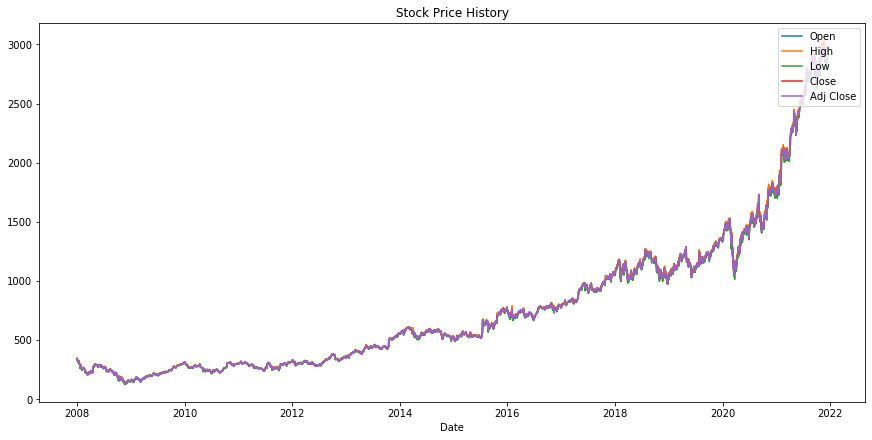

In [14]:
his = stock_price
his["Date"] = pd.to_datetime(his["Date"])
datetime = his['Date']
op = his['Open']
hi = his['High']
lo = his['Low']
cl = his['Close']
ac = his['Adj Close']


fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 6))

# open:
ax.plot(datetime, op, label='Open')
ax.legend(loc='upper right')

# High:
ax.plot(datetime, hi, label='High')
ax.legend(loc='upper right')

# Low:
ax.plot(datetime, lo, label='Low')
ax.legend(loc='upper right')

# close:
ax.plot(datetime, cl, label='Close')
ax.legend(loc='upper right')

# Adj Close:
ax.plot(datetime, ac, label='Adj Close')
ax.legend(loc='upper right')


ax.set_xlabel('Date')

ax.set_title('Stock Price History')



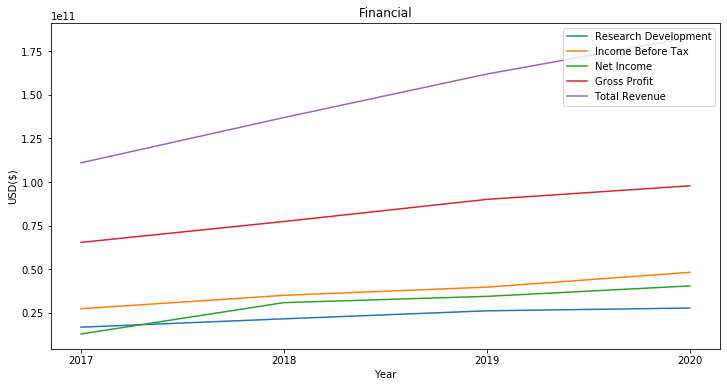

In [15]:
fn = Financials
fn = fn.iloc[::-1]
yr = ['2017', '2018', '2019', '2020']


fig, ax = plt.subplots(figsize=(12, 6))

# Research Development:
ax.plot(yr, fn['Research Development'], label='Research Development')
ax.legend(loc='upper right')

# Income Before Tax
ax.plot(yr, fn['Income Before Tax'], label='Income Before Tax')
ax.legend(loc='upper right')

# Net Income
ax.plot(yr, fn['Net Income'], label='Net Income')
ax.legend(loc='upper right')

# Gross Profit
ax.plot(yr, fn['Gross Profit'], label='Gross Profit')
ax.legend(loc='upper right')

# Total Revenue
ax.plot(yr, fn['Total Revenue'], label='Total Revenue')
ax.legend(loc='upper right')

ax.set_ylabel('USD($)')  
ax.set_xlabel('Year')

ax.set_title('Financial')
plt.show()

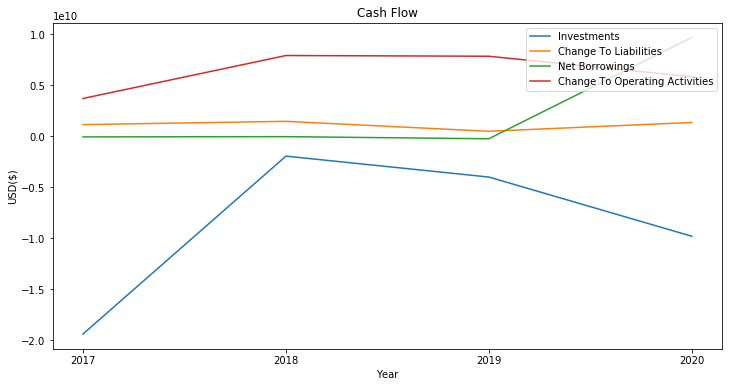

In [16]:
cf = cashflow
cf = cf.iloc[::-1]
yr = ['2017', '2018', '2019', '2020']


fig, ax = plt.subplots(figsize=(12, 6))

# Investments:
ax.plot(yr, cf['Investments'], label='Investments')
ax.legend(loc='upper right')

# Change To Liabilities:
ax.plot(yr, cf["Change To Liabilities"], label='Change To Liabilities')
ax.legend(loc='upper right')

# Net Borrowings:
ax.plot(yr, cf['Net Borrowings'], label='Net Borrowings')
ax.legend(loc='upper right')

# Change To Operating Activities:
ax.plot(yr, cf['Change To Operating Activities'], label='Change To Operating Activities')
ax.legend(loc='upper right')

ax.set_ylabel('USD($)')  
ax.set_xlabel('Year')

ax.set_title('Cash Flow')
plt.show()

Text(0.5, 1.0, 'Earnings')

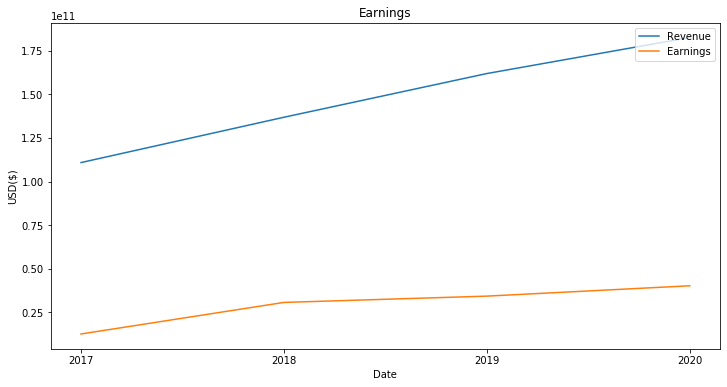

In [17]:
en = earning
yr = ['2017', '2018', '2019', '2020']




fig, ax = plt.subplots(figsize=(12, 6))

# Revenue:
ax.plot(yr, en["Revenue"], label='Revenue')

ax.legend(loc='upper right')


# Earnings:
ax.plot(yr, en["Earnings"], label='Earnings')

ax.legend(loc='upper right')


ax.set_ylabel('USD($)')  
ax.set_xlabel('Date')

ax.set_title('Earnings')

# Applying LSTM

In [18]:
import pandas as pd
import numpy as np
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from keras import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math



/Users/dshadow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [19]:
# selecting the data for LSTM
dataset = pd.read_sql_query("""SELECT * FROM Stock_Prices WHERE Date < '2019-01-01' AND Company = 'Google'""", conn)

Text(0.5, 1.0, 'Stock Price History')

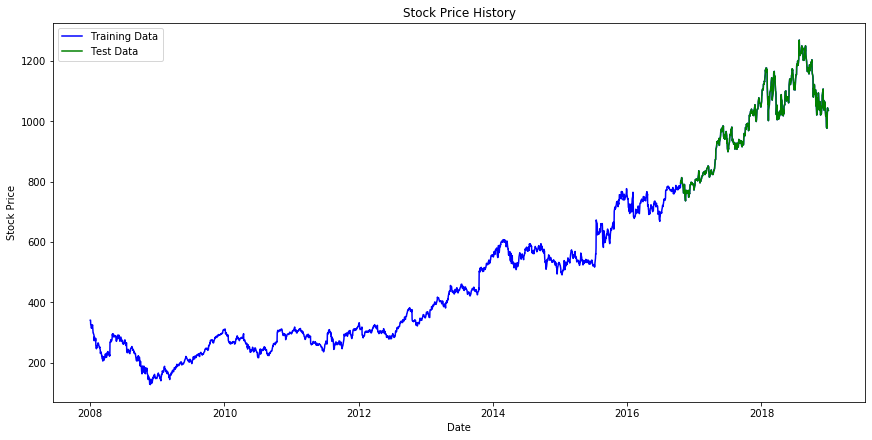

In [20]:
# splitting the training and test data
# plot them into one graph 
df = dataset
train_data , test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

datetime = pd.to_datetime(df["Date"])
datetime_test = pd.to_datetime(test_data["Date"])
fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 6))


ax.plot(datetime, df['Close'], 'blue', label='Training Data')
ax.plot(datetime_test, test_data['Close'], 'green', label='Test Data')
ax.legend(loc='upper left')

ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price History')






In [21]:
# assigning input features

train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data = train_data.sort_values(by=['Date'], ascending=True).reset_index()

input_feature = train_data[['Open', 'High', 'Low', 'Close']]
input_data = input_feature.values

/Users/dshadow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# appying for the scaler 

scaler = MinMaxScaler(feature_range=(0,1))
input_data[:,:] = scaler.fit_transform(input_data[:,:])

lookback=50
total_size=len(train_data)
X=[]
y=[]
for i in range(0, total_size-lookback): 
    t=[]
    for j in range(0, lookback): 
        current_index = i+j
        t.append(input_data[current_index, :]) 
    X.append(t)
    y.append(input_data[lookback+i, 0])

In [23]:
# splitting training, test and validation sets

test_size=100 
X, y= np.array(X), np.array(y)
X_test = X[:test_size]
Y_test = y[:test_size]

X_work = X[test_size:]
y_work = y[test_size:]

validate_size = 10

X_valid = X[:validate_size]
y_valid = y[:validate_size]
X_train = X[validate_size:]
y_train = y[validate_size:]


X_train = X_train.reshape(X_train.shape[0], lookback, 4)
X_valid = X_valid.reshape(X_valid.shape[0], lookback, 4)
X_test = X_test.reshape(X_test.shape[0], lookback, 4)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(2155, 50, 4)
(10, 50, 4)
(100, 50, 4)


In [24]:
# setting up the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(X.shape[1], 4)))
model.add(LSTM(50, return_sequences=True, activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11000     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51,451
Trainable params: 51,451
Non-trainable params: 0
_________________________________________________________________


In [25]:
# fitting the model with the compile
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_valid, y_valid), callbacks=callbacks)


Epoch 1/100
215/216 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 9.3023e-04
Epoch 00001: val_loss improved from inf to 0.00051, saving model to model.h5
216/216 [==============================] - 13s 42ms/step - loss: 0.0098 - accuracy: 9.2807e-04 - val_loss: 5.0780e-04 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/100
216/216 [==============================] - ETA: 0s - loss: 8.6834e-04 - accuracy: 9.2807e-04
Epoch 00002: val_loss improved from 0.00051 to 0.00026, saving model to model.h5
216/216 [==============================] - 8s 35ms/step - loss: 8.6834e-04 - accuracy: 9.2807e-04 - val_loss: 2.5719e-04 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
215/216 [============================>.] - ETA: 0s - loss: 7.7357e-04 - accuracy: 9.3023e-04
Epoch 00003: val_loss improved from 0.00026 to 0.00020, saving model to model.h5
216/216 [==============================] - 6s 28ms/step - loss: 7.7337e-04 - accuracy: 9.2807e-04 - val_loss: 1.9706e-04 - val_accu

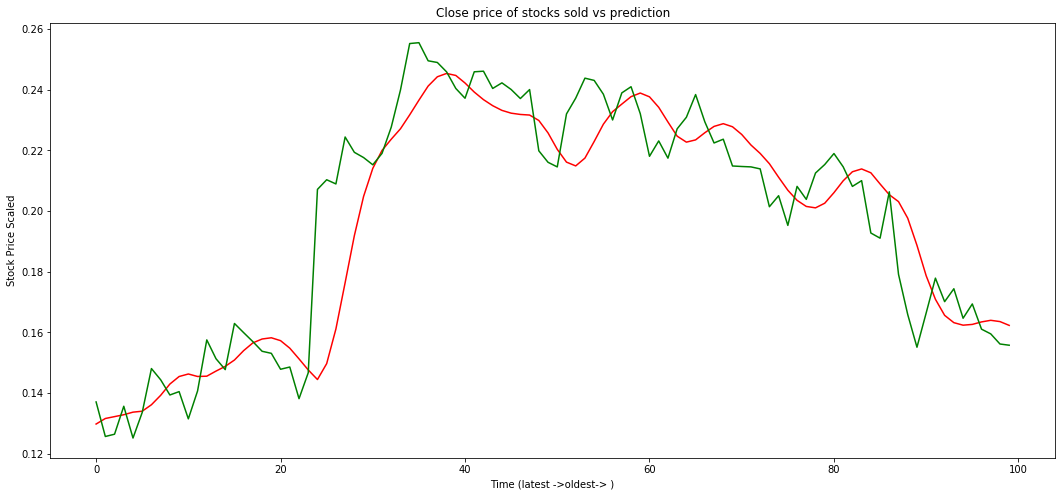

In [26]:
# plotting predicted values with the true values
predicted_value = model.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(predicted_value, color= 'red')
plt.plot(Y_test, color='green')
plt.title("Close price of stocks sold vs prediction")
plt.xlabel("Time (latest ->oldest-> )")
plt.ylabel("Stock Price Scaled")
plt.show()

In [27]:
# obtaining the MSE with scaled values
mean_squared_error(Y_test,predicted_value)

0.0002455354793423497

In [28]:
# creating a data frame to compare the difference 
result = pd.DataFrame()
result['Close'] = Y_test
result['Prediction'] = predicted_value
result['Difference'] = abs(result['Close']-result['Prediction'])
result[0:30]

,Close,Prediction,Difference
0,0.137062,0.129780,0.007282
1,0.125677,0.131607,0.005930
2,0.126429,0.132225,0.005796
3,0.135641,0.132850,0.002791
4,0.125168,0.133697,0.008528
5,0.133606,0.134006,0.000400
6,0.148059,0.136140,0.011919
7,0.144360,0.139245,0.005115
8,0.139355,0.142962,0.003607
9,0.140464,0.145440,0.004976


In [29]:
# the mean of median of the difference values
print(result['Difference'].mean())
print(result['Difference'].median())


0.010824329361004503
0.007089059619491966


## Repeated the same precedure for the test data

In [30]:
# assginment input features
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data = test_data.sort_values(by=['Date'], ascending=True).reset_index()
input_feature1 = test_data[['Open', 'High', 'Low', 'Close']]
input_data1 = input_feature1.values


/Users/dshadow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
# applying the scaler
scaler = MinMaxScaler(feature_range=(0,1))
input_data1[:,:] = scaler.fit_transform(input_data1[:,:])

lookback1=50
total_size1=len(test_data)
X1=[]
y1=[]
for i in range(0, total_size1-lookback1): 
    t1=[]
    for j in range(0, lookback1): 
        current_index1 = i+j
        t1.append(input_data1[current_index1, :]) 
    X1.append(t1)
    y1.append(input_data1[lookback1+i, 0])

In [32]:
# splitting the training, test and validation sets

test_size1=100 
X1, y1= np.array(X1), np.array(y1)
X_test1 = X1[:test_size1]
Y_test1 = y1[:test_size1]

X_work1 = X1[test_size1:]
y_work1 = y1[test_size1:]

validate_size1 = 10

X_valid1 = X1[:validate_size1]
y_valid1 = y1[:validate_size1]
X_train1= X1[validate_size1:]
y_train1 = y1[validate_size1:]


X_train1 = X_train1.reshape(X_train1.shape[0], lookback1, 4)
X_valid1 = X_valid1.reshape(X_valid1.shape[0], lookback1, 4)
X_test1 = X_test1.reshape(X_test1.shape[0], lookback1, 4)
print(X_train1.shape)
print(X_valid1.shape)
print(X_test1.shape)

(494, 50, 4)
(10, 50, 4)
(100, 50, 4)


In [33]:
# setting up the LSTM model
model1 = Sequential()
model1.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(X1.shape[1], 4)))
model1.add(LSTM(50, return_sequences=True, activation='relu'))
model1.add(LSTM(50))
model1.add(Dense(1))

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            11000     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 51,451
Trainable params: 51,451
Non-trainable params: 0
_________________________________________________________________


In [34]:
# fitting the model for the test data 
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model1.fit(X_train1, y_train1, epochs=10, batch_size=1, validation_data=(X_valid1, y_valid1), callbacks=callbacks)

Epoch 1/10
492/494 [============================>.] - ETA: 0s - loss: 0.0147 - accuracy: 0.0020
Epoch 00001: val_loss improved from inf to 0.00316, saving model to model.h5
494/494 [==============================] - 12s 20ms/step - loss: 0.0147 - accuracy: 0.0020 - val_loss: 0.0032 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/10
493/494 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.0020
Epoch 00002: val_loss improved from 0.00316 to 0.00064, saving model to model.h5
494/494 [==============================] - 10s 20ms/step - loss: 0.0058 - accuracy: 0.0020 - val_loss: 6.4276e-04 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/10
494/494 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.0020
Epoch 00003: val_loss did not improve from 0.00064
494/494 [==============================] - 9s 19ms/step - loss: 0.0047 - accuracy: 0.0020 - val_loss: 8.6953e-04 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/10
492/494 [==========================

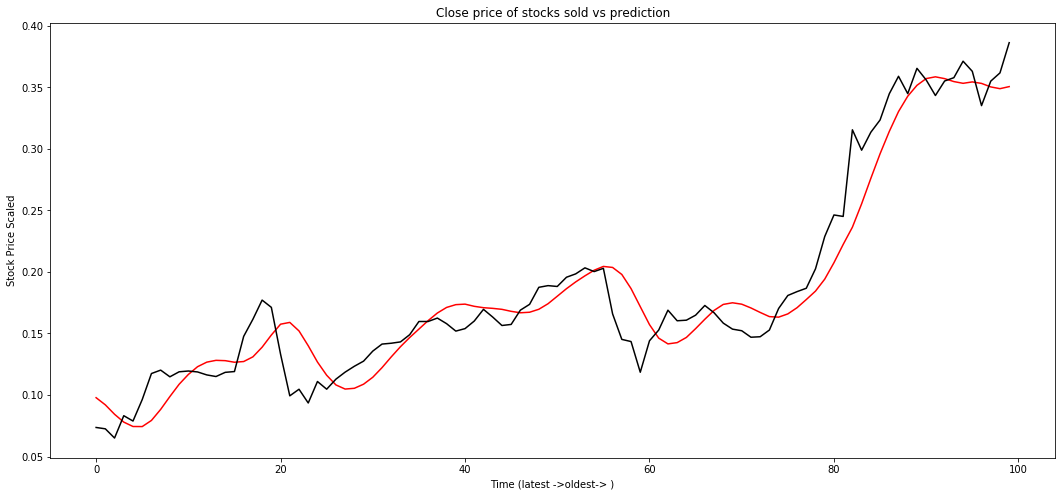

In [35]:
# plotting the predicted values and true values
predicted_value1 = model.predict(X_test1)
plt.figure(figsize=(18, 8))
plt.plot(predicted_value1, color= 'red')
plt.plot(Y_test1, color='black')
plt.title("Close price of stocks sold vs prediction")
plt.xlabel("Time (latest ->oldest-> )")
plt.ylabel("Stock Price Scaled")
plt.show()

In [36]:
# obtaining the MSE scaled
mean_squared_error(Y_test1,predicted_value1)

0.0005328434083313997

In [37]:
# creating a dataframe to compare the difference
result = pd.DataFrame()
result['Close'] = Y_test1
result['Prediction'] = predicted_value1
result['Difference'] = abs(result['Close']-result['Prediction'])
result[0:30]


,Close,Prediction,Difference
0,0.073593,0.097787,0.024194
1,0.072491,0.091971,0.019480
2,0.065006,0.084310,0.019303
3,0.083148,0.077947,0.005201
4,0.078817,0.074380,0.004437
5,0.096256,0.074321,0.021934
6,0.117418,0.079296,0.038122
7,0.120191,0.088282,0.031909
8,0.114758,0.098724,0.016035
9,0.118824,0.108674,0.010150


In [38]:
# the mean of median of the difference values
print(result['Difference'].mean())
print(result['Difference'].median())


0.017947214724697944
0.014364600358532376


# Applying ARIMA

In [39]:
# selecting the data for ARIMA
dataset = pd.read_sql_query("""SELECT * FROM Stock_Prices WHERE Date < '2019-01-01' AND Company = 'Google'""", conn)

Text(0.5, 1.0, 'Historical Stock Close Price')

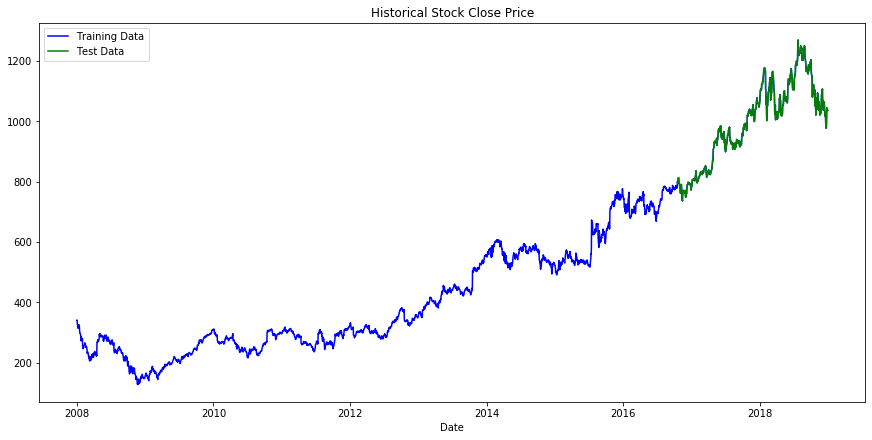

In [40]:
# splitting the training and test set
# plot them into one graph

df = dataset
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]


train_array = train_data[['Close']].values
test_array = test_data[['Close']].values

datetime = pd.to_datetime(df["Date"])
datetime_test = pd.to_datetime(test_data["Date"])
fig, ax = plt.subplots(constrained_layout=True, figsize=(12, 6))


ax.plot(datetime, df['Close'], 'blue', label='Training Data')
ax.plot(datetime_test, test_data['Close'], 'green', label='Test Data')
ax.legend(loc='upper left')

ax.set_xlabel('Date')
ax.set_title('Historical Stock Close Price')



In [41]:
# fitting the ARIMA MODEL
# obtaining the predicted values

history = [x for x in train_array]
predictions = list()

for i in range(len(test_array)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    predictions.append(model_fit.forecast()[0])
    history.append(test_array[i])

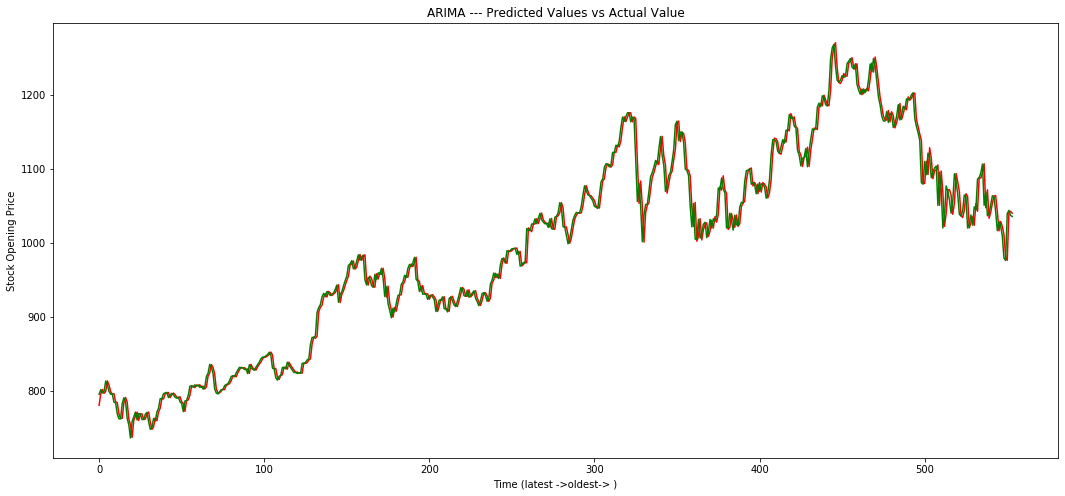

In [42]:
# plotting the predicted values and true values
plt.figure(figsize=(18, 8))
plt.plot(predictions, color= 'red')
plt.plot(test_array, color='green')
plt.title("ARIMA --- Predicted Values vs Actual Value")
plt.xlabel("Time (latest ->oldest-> )")
plt.ylabel("Stock Opening Price")
plt.show()

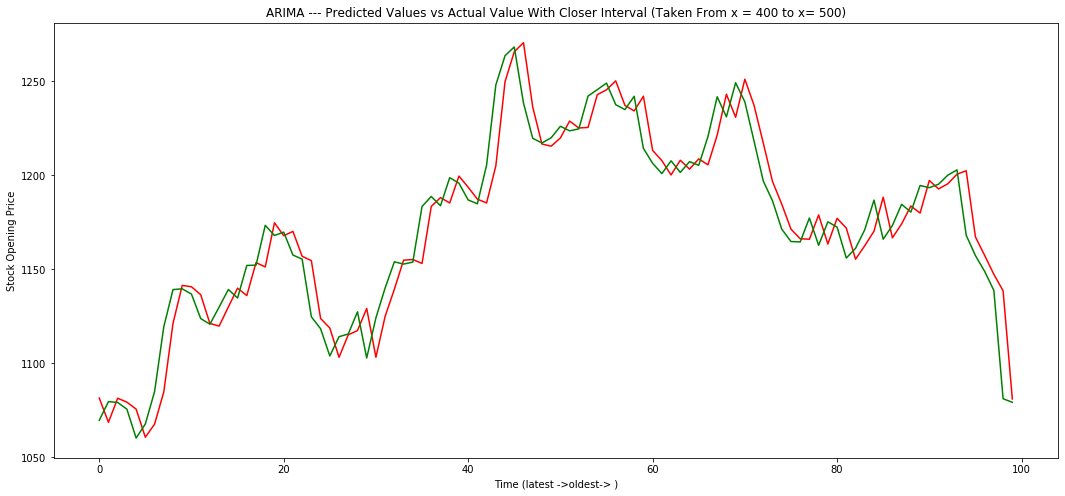

In [43]:
# take a closer look of the above data
# plotting the predicted values and true values with closer interval
plt.figure(figsize=(18, 8))
plt.plot(predictions[400:500], color= 'red')
plt.plot(test_array[400:500], color='green')
plt.title("ARIMA --- Predicted Values vs Actual Value With Closer Interval (Taken From x = 400 to x= 500)")
plt.xlabel("Time (latest ->oldest-> )")
plt.ylabel("Stock Opening Price")
plt.show()

In [44]:
# creating a data frame to compare the difference

prediction = np.array(predictions)
true_y = np.array(test_data['Close'])[0:554]
diff = np.array(true_y - prediction)

result = pd.DataFrame()
result['Close'] = true_y
result['Prediction'] = prediction
result['Difference'] = abs(result['Close']-result['Prediction'])

In [45]:
result[0:20]

,Close,Prediction,Difference
0,795.260010,780.338469,14.921541
1,801.500000,795.812218,5.687782
2,796.969971,801.670935,4.700964
3,799.369995,796.592483,2.777512
4,813.109985,799.013990,14.095995
5,807.669983,813.381612,5.711629
6,799.070007,807.772883,8.702876
7,795.349976,798.800026,3.450050
8,795.369995,795.388131,0.018136
9,784.539978,795.958798,11.418820


In [46]:
# creating a dataframe to compare the difference
print(result['Difference'].mean())
print(result['Difference'].median())

10.133809538092649
6.765369034564799


## For obtaining the model accuracy for ARIMA, we could apply mean absolute percentage error.

![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/5ada3996551e35503a1605edd4e35a26f1215d36)

https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

In [47]:
# calculating the mape
mape = np.sum(np.abs((predictions - true_y)/(true_y)))/(len(predictions)*len(true_y))*100
mape

15.889802721189666

In [48]:
# calculating the accuracy
Accuracy = 100 - mape
Accuracy

84.11019727881033